<a href="" target="_blank">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Building a Deep Neural Network with PyTorch

In this chapter, we will shift gears and learn how to perform image classification using neural networks. Essentially, we will learn how to represent images and tweak the hyperparameters of a neural network to understand their impact.

we will learn about how an image is represented: only then will we do a deep dive into the details of hyperparameters. While learning about the impact of hyperparameters, we will restrict ourselves to one dataset: Fashion MNIST (details about the dataset can be found at https://github.com/zalandoresearch/fashion-mnist), so that we can make a comparison of the impact of variations in various hyperparameters. Through this dataset, we will also be introduced to training and validation data and why it is important to have two separate datasets. Finally, we will learn about the concept of overfitting a neural network and then understand how certain hyperparameters help us avoid overfitting.

In summary, in this chapter, we will cover the following topics:

- Representing an image
- Why leverage neural networks for image analysis?
- Preparing data for image classification
- Training a neural network
- Scaling a dataset to improve model accuracy
- Building a deeper neural network
- The concept of overfitting

## Representing an image

A digital image file (typically associated with the extension “JPEG” or “PNG”) is comprised of an array of pixels. A pixel is the smallest constituting element of an image. In a grayscale image, each pixel is a scalar (single) value between `0` and `255`: 0 is black, 255 is white, and anything in between is gray (the smaller the pixel value, the darker the pixel is). On the other hand, the pixels in color images are three-dimensional vectors that correspond to the scalar values that can be found in their red, green, and blue channels.

An image has *height x width x c* pixels, where *height* is the number of **rows** of pixels, *width* is the number of **columns** of pixels, and *c* is the number of **channels**. *c* is `3` for color images (one channel each for the *red*, *green*, and *blue* intensities of the image) and `1` for grayscale images. An example grayscale image containing 3 x 3 pixels and their corresponding scalar values is shown here:

![Representing an image](images/fig1.png "Representing an image")

Again, a pixel value of `0` means that it is pitch black, while `255` means it is pure luminance (that is, pure white for grayscale and pure red/green/blue in the respective channel for a color image).

### Converting images into structured arrays and scalars

Python can convert images into structured arrays and scalars as follows:

1. Import the `cv2` (to read an image from disk) and `matplotlib` (to plot the loaded image) libraries, and read the downloaded image into the Python environment: 

In [1]:
import cv2, matplotlib.pyplot as plt
%matplotlib inline

img = cv2.imread('images/MyImage.JPG')

In the preceding line of code, we leverage the `cv2.imread` method to read the image. This converts an image into an array of pixel values.

2. We’ll crop the image between the 50th and 250th rows, as well as the 40th and 240th columns. Finally, we’ll convert the image into grayscale using the following code and plot it:

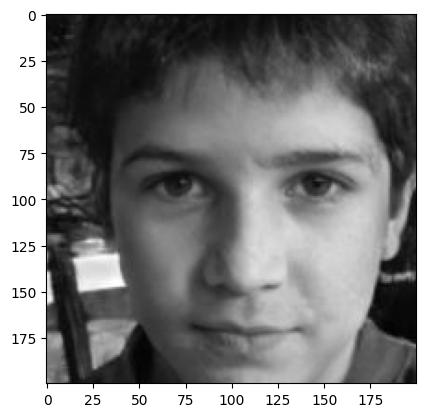

In [2]:
# Crop image
img = img[50:250,40:240]

# Convert image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Show image
plt.imshow(img_gray, cmap='gray')

You might have noticed that the preceding image is represented as a 200 x 200 array of pixels. Now, let’s reduce the number of pixels that are used to represent the image so that we can overlay the pixel values on the image (this would be tougher to do if we were to visualize the pixel values over a 200 x 200 array, compared to a 25 x 25 array).

3. Convert the image into a 25 x 25 array and plot it: 

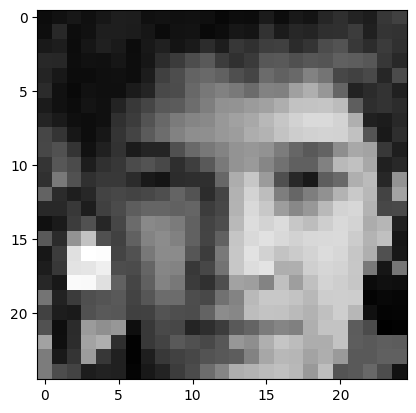

In [3]:
img_gray_small = cv2.resize(img_gray,(25,25))

plt.imshow(img_gray_small, cmap='gray')

Naturally, having fewer pixels to represent the same image results in a blurrier output.

4. Let’s inspect the pixel values. Note that in the following output, due to space constraints, we have pasted only the first four rows of pixel values: 

In [4]:
print(img_gray_small)

[[ 21  26  31  25  31  38  37  25  27  25  26  24  18  22  21  35  22  33
   29  45  53  42  37  60  69]
 [ 23  47  22  26  38  38  36  30  20  27  28  19  22  31  29  56  35  46
   43  53  55  65  40  58  56]
 [ 33  37  21  30  39  34  21  32  40  29  34  50  37  60  54  67  68  49
   58  79  86  62  51  64  54]
 [ 47  46  22  26  25  30  22  30  50  64  80  91  65  54  63  89  91  83
   89  87  97  95  89  60  47]
 [ 44  32  21  21  24  25  22  36  68  80 100 106  99  82  73 107  99 106
  128 116  75  70  77  45  78]
 [ 49  26  19  26  24  24  35  43  77  79 105 119 127 120 107 128 126 155
  169 147 102  41  49  57  39]
 [ 35  26  21  29  25  42  61  73  90  93 109 125 142 144 151 156 168 186
  188 189 181  96  52  57  51]
 [ 43  34  24  22  25  55  66  86 105 122 131 135 148 156 163 177 190 201
  208 208 202 169  39  36  47]
 [ 74  58  31  22  31  58  72  93 109 128 139 140 148 153 167 174 187 196
  200 203 201 185  87  33  52]
 [ 75  84  58  26  39  56  35  44  43  83 106 119 129 1

### Creating a structured array for colored images

The preceding steps apply to color images too, which are represented as three-dimensional vectors. The brightest red pixel is denoted as `(255,0,0)`. Similarly, a pure white pixel in a three-dimensional vector image is represented as `(255,255,255)`. With this in mind, let’s create a structured array of pixel values for a colored image:

1. Import the relevant packages and load the image: 

In [5]:
import cv2, matplotlib.pyplot as plt

%matplotlib inline
img = cv2.imread("images/MyImage.JPG")

2. Crop the image: 

In [6]:
img = img[50:250, 40:240, :]
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Note that in the preceding code, we’ve reordered the channels using the `cv2.cvtcolor` method. We’ve done this because when we import images using cv2, the channels are ordered as blue first, green next, and finally, red; typically, we are used to looking at images in RGB channels, where the sequence is red, green, and then blue.

3. Plot the image that’s obtained: 

(200, 200, 3)


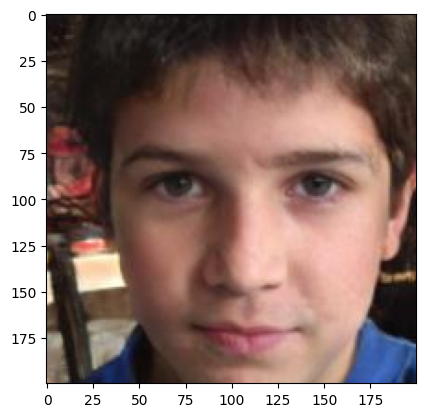

In [7]:
plt.imshow(img)

print(img.shape)

4. The bottom-right 3 x 3 array of pixels can be obtained as follows:

In [8]:
crop = img[-3:,-3:]

5. Print and plot the pixel values:

[[[14 22 43]
  [18 26 47]
  [21 34 68]]

 [[20 25 45]
  [25 30 50]
  [25 36 66]]

 [[22 25 44]
  [27 32 51]
  [30 39 68]]]


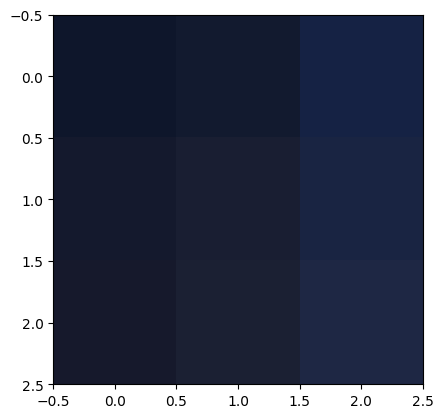

In [9]:
print(crop)

plt.imshow(crop)

Now that we have learned how to represent an image (i.e., a file on your computer) as a tensor, we are now in a position to learn various mathematical operations and techniques that can leverage these tensors to perform tasks, such as image classification, object detection, image segmentation and many more throughout this book.

But first, let’s understand why **artifical neural networks (ANNs)** are useful for image analysis.

## Why leverage neural networks for image analysis?

In traditional computer vision, we would create a few features for every image before using them as input. Let’s look at a few such features based on the following sample image, in order to appreciate the effort we save by training a neural network:

![A subset of features that can be generated from an image](images/fig2.png "A subset of features that can be generated from an image")

Note that we will not walk you through how to get these features, as the intention here is to help you realize why creating features manually is a suboptimal exercise. However, you can familiarize yourself with the different feature extraction methods at https://docs.opencv.org/4.x/d7/da8/tutorial_table_of_content_imgproc.html:

- **Histogram feature**: For some tasks, such as auto-brightness or night vision, it is important to understand the illumination in the picture: that is, the fraction of pixels that are bright or dark.
- **Edges and corners feature**: For tasks such as image segmentation, where it is important to find the set of pixels corresponding to each person, it makes sense to extract the edges first because the border of a person is just a collection of edges. In other tasks, such as image registration, it is vital that key landmarks are detected. These landmarks will be a subset of all the corners in an image.
- **Color separation feature**: In tasks such as traffic light detection for a self-driving car, it is important that the system understands what color is displayed on the traffic lights.
- **Image gradients feature**: Taking the color separation feature a step further, it might be important to understand how the colors change at the pixel level. Different textures can give us different gradients, which means they can be used as texture detectors. In fact, finding gradients is a prerequisite for edge detection.

These are just a handful of such features. There are so many more that it is difficult to cover all of them. The main drawback of creating these features is that you need to be an expert in image and signal analysis and should fully understand what features are best suited to solve a problem. Even if both constraints are satisfied, there is no guarantee that such an expert will be able to find the right combination of inputs, and even if they do, there is still no guarantee that such a combination will work in new, unseen scenarios.

Due to these drawbacks, the community has largely shifted to neural network-based models. These models not only find the right features automatically but also learn how to optimally combine them to get the job done. As we have already seen in the first chapter, neural networks act as both feature extractors and classifiers.

Now that we’ve had a look at some examples of historical feature extraction techniques and their drawbacks, let’s learn how to train a neural network on images.


## Preparing our data for image classification

Given that we are covering multiple scenarios in this chapter, in order for us to see the advantage of one scenario over the other, we will work on a single dataset throughout this chapter: the Fashion MNIST dataset: which contains images of 10 different classes of clothing (shirts, trousers, shoes, and so on). Let’s prepare this dataset:

1. Start by downloading the dataset and importing the relevant packages. The `torchvision` package contains various datasets, one of which is the `FashionMNIST` dataset, which we will work on in this chapter: 

In [10]:
from torchvision import datasets

data_folder = 'data/FMNIST' # This can be any directory you want to download FMNIST to

fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)

In the preceding code, we specify the folder (`data_folder`) where we want to store the downloaded dataset. Then, we fetch the `fmnist` data from `datasets.FashionMNIST` and store it in `data_folder`. Furthermore, we specify that we only want to download the training images by specifying `train = True`.

2. Next, we must store the images that are available in `fmnist.data` as `tr_images` and the labels (targets) that are available in `fmnist.targets` as `tr_targets`: 

In [11]:
tr_images = fmnist.data
tr_targets = fmnist.targets

3. Inspect the tensors that we are dealing with

In [12]:
unique_values = tr_targets.unique()
print(
    f"tr_images & tr_targets:\n\tX - {tr_images.shape}\n\tY - {tr_targets.shape}\n\tY - Unique Values : {unique_values}"
)
print(f"TASK:\n\t{len(unique_values)} class Classification")
print(f"UNIQUE CLASSES:\n\t{fmnist.classes}")

tr_images & tr_targets:
	X - torch.Size([60000, 28, 28])
	Y - torch.Size([60000])
	Y - Unique Values : tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
TASK:
	10 class Classification
UNIQUE CLASSES:
	['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Here, we can see that there are 60,000 images, each 28 x 28 in size, and with 10 possible classes across all the images. Note that `tr_targets` contains the numeric values for each class, while `fmnist.classes` gives us the names that correspond to each numeric value in `tr_targets`.

4. Plot a random sample of 10 images for all the 10 possible classes:
    1. Import the relevant packages in order to plot a grid of images so that you can also work on arrays:


In [13]:
import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np

4. 
    2. Create a plot where we can show a 10 x 10 grid, where each row of the grid corresponds to a class and each column presents an example image belonging to the row’s class. Loop through the unique class numbers (label_class) and fetch the indices of rows (label_x_rows) corresponding to the given class number:

        ```python
        R, C = len(tr_targets.unique()), 10
        fig, ax = plt.subplots(R, C, figsize=(10,10))
        for label_class, plot_row in enumerate(ax):
            label_x_rows = np.where(tr_targets == label_class)[0]
        ```

Note that in the preceding code, we fetch the 0th index as the output of the `np.where` condition, as it has a length of 1. It contains an array of all the indices where the target value (`tr_targets`) is equal to `label_class`.

4. 
    3. Loop through 10 times to fill the columns of a given row. Furthermore, we need to select a random value (`ix`) from the indices corresponding to a given class that were obtained previously (`label_x_rows`) and plot them:

        ```python
            for plot_cell in plot_row:
                plot_cell.grid(False); plot_cell.axis('off')
                ix = np.random.choice(label_x_rows)
                x, y = tr_images[ix], tr_targets[ix]
                plot_cell.imshow(x, cmap='gray')
        plt.tight_layout()
        ```

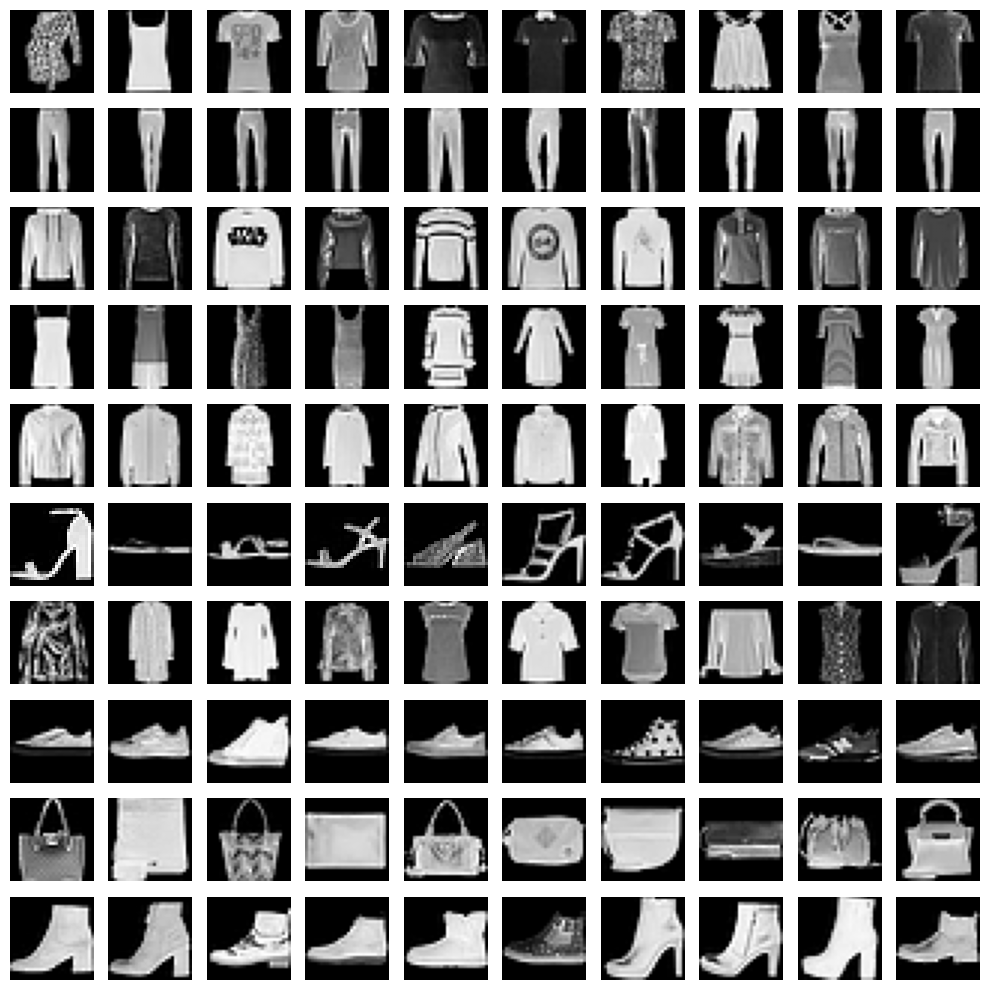

In [14]:
R, C = len(tr_targets.unique()), 10
fig, ax = plt.subplots(R, C, figsize=(10, 10))
for label_class, plot_row in enumerate(ax):
    label_x_rows = np.where(tr_targets == label_class)[0]
    for plot_cell in plot_row:
        plot_cell.grid(False)
        plot_cell.axis("off")
        ix = np.random.choice(label_x_rows)
        x, y = tr_images[ix], tr_targets[ix]
        plot_cell.imshow(x, cmap="gray")
plt.tight_layout()

Note that in the preceding image, each row represents a sample of 10 different images all belonging to the same class.

## Training a neural network

To train a neural network, we must perform the following steps:

1. Import the relevant packages
2. Build a dataset that can fetch data one data point at a time
3. Wrap the dataloader from the dataset
4. Build a model and then define the loss function and the optimizer
5. Define two functions to train and validate a batch of data, respectively
6. Define a function that will calculate the accuracy of the data
7. Perform weight updates based on each batch of data over increasing epochs

In the following lines of code, we’ll perform each of the following steps:

1. Import the relevant packages and the fmnist dataset:

In [15]:
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn
from torchvision import datasets
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [16]:
device = "cuda" if torch.cuda.is_available() else "cpu"

data_folder = 'data/FMNIST' # This can be any directory you want to download FMNIST to

fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)

tr_images = fmnist.data
tr_targets = fmnist.targets

2. Build a class that fetches the dataset. Remember that it is derived from a `Dataset` class and needs three magic functions, `__init__`, `__getitem__`, and `__len__`, to **always** be defined: 

In [17]:
class FMNISTDataset(Dataset):
    def __init__(self, x, y):
        x = x.float()
        x = x.view(-1,28*28)
        self.x, self.y = x, y
    
    def __getitem__(self, ix):
        x, y = self.x[ix], self.y[ix]
        return x.to(device), y.to(device)
    
    def __len__(self):
        return len(self.x)

Note that in the `__init__` method, we convert the input into a floating-point number and also flatten each image into 28*28 = 784 numeric values (where each numeric value corresponds to a pixel value). We also specify the number of data points in the `__len__` method; here, it is the length of `x`. The `__getitem__` method contains logic for what should be returned when we ask for the `ix`th data point (`ix` will be an integer between 0 and `__len__`).

3. Create a function that generates a training DataLoader, `trn_dl`, from the dataset called `FMNISTDataset`. This will sample 32 data points at random for the batch size:

In [18]:
def get_data():
    train = FMNISTDataset(tr_images, tr_targets)
    trn_dl = DataLoader(train, batch_size=32, shuffle=True)
    return trn_dl

4. Define a model, as well as the loss function and the optimizer: 

In [19]:
from torch.optim import SGD

def get_model():
    model = nn.Sequential(
                nn.Linear(28 * 28, 1000),
                nn.ReLU(),
                nn.Linear(1000, 10)
            ).to(device)
    
    loss_fn = nn.CrossEntropyLoss()
    optimizer = SGD(model.parameters(), lr=1e-2)
    return model, loss_fn, optimizer

The model is a network with one hidden layer containing 1,000 neurons. The output is a 10-neuron layer, since there are 10 possible classes. Furthermore, we call the `CrossEntropyLoss` function, since the output can belong to any of the 10 classes for each image. Finally, the key aspect to note in this exercise is that we have initialized the learning rate, `lr`, to a value of `0.01` and not the default of `0.001`, to see how the model will learn for this exercise.

> Note that we are not using “softmax” in the neural network at all. The range of outputs is unconstrained, in that values can have an infinite range, whereas cross-entropy loss typically expects outputs as probabilities (each row should sum to 1). Unconstrained values in output still work in this setting because `nn.CrossEntropyLoss` actually expects us to send the raw logits (that is, unconstrained values). It performs softmax internally.

5. Define a function that will train the dataset on a batch of images: 

In [20]:
def train_batch(x, y, model, opt, loss_fn):
    model.train() # <- let's hold on to this until we reach dropout section
    
    # call your model like any python function on your batch of inputs
    prediction = model(x)
    
    # compute loss
    batch_loss = loss_fn(prediction, y)
    
    # based on the forward pass in `model(x)` compute all the gradients of 'model.parameters()'
    batch_loss.backward()
    
    # apply new-weights = f(old-weights, old-weight-gradients) where "f" is the optimizer
    opt.step()
    
    # Flush gradients memory for next batch of calculations
    opt.zero_grad()
    
    return batch_loss.item(), prediction

The preceding code passes the batch of images through the model in the forward pass. It also computes the loss on the batch and then passes the weights through backward propagation and updates them. Finally, it flushes the memory of the gradient so that it doesn’t influence how the gradient is calculated in the next pass.

Now that we’ve done this, we can extract the loss value as a scalar by fetching `batch_loss.item()` on top of `batch_loss`.

6. Build a function that calculates the accuracy of a given dataset: 

In [21]:
# since there's no need for updating weights, we might as well not compute the gradients.
# Using this '@' decorator on top of functions will disable gradient computation in the entire function

@torch.no_grad()
def accuracy(prediction, y):
    # compute if the location of maximum in each row coincides with ground truth
    preds = prediction.argmax(dim=-1)
    is_correct = preds == y

    return is_correct.cpu().numpy().tolist()

In the preceding code, we explicitly mention that we don’t need to calculate the gradient by providing `@torch.no_grad()` and calculating the `prediction` values, by feed-forwarding input through the model. Next, we invoke `prediction.max(-1)` to identify the `argmax` index corresponding to each row. We then compare our `argmaxes` with the ground truth through `argmaxes == y` so that we can check whether each row is predicted correctly. Finally, we return the list of `is_correct` objects after moving it to a CPU and converting it into a NumPy array.

7. Train the neural network using the following lines of code:
    1. Initialize the model, loss, optimizer, and DataLoaders:

In [22]:
trn_dl = get_data()
model, loss_fn, optimizer = get_model()

7. 
    2. Initialize the lists that will contain the accuracy and loss values at the end of each epoch:

        ```python
        losses, accuracies = [], []
        ```

7. 
    3. Define the number of epochs:

        ```python
        for epoch in range(5):
            print(epoch)
        ```

7. 
    4. Initialize the lists that will contain the accuracy and loss values corresponding to each batch within an epoch:

        ```python
            epoch_losses, epoch_accuracies = [], []
        ```

7. 
    5. Create batches of training data by iterating through the DataLoader:

        ```python
            for ix, batch in enumerate(iter(trn_dl)):
                x, y = batch
        ```

7. 
    6. Train the batch using the `train_batch` function, and store the loss value at the end of training on top of the batch as `batch_loss`. Furthermore, store the loss values across batches in the `epoch_losses` list:

        ```python
                batch_loss = train_batch(x, y, model, optimizer, loss_fn)
                epoch_losses.append(batch_loss)
        ```

7. 
    7. We store the mean loss value across all batches within an epoch:

        ```python
            epoch_loss = np.array(epoch_losses).mean()
        ```

7. 
    8. Next, we calculate the accuracy of the prediction at the end of training on all batches:

        ```python
            for ix, batch in enumerate(iter(trn_dl)):
                x, y = batch
                is_correct = accuracy(x, y, model)
                epoch_accuracies.extend(is_correct)
            epoch_accuracy = np.mean(epoch_accuracies)
        ```

7. 
    9. Store the loss and accuracy values at the end of each epoch in a list:

        ```python
            losses.append(epoch_loss)
            accuracies.append(epoch_accuracy)
        ```

In [23]:
losses, accuracies = [], []
for epoch in range(5):
    epoch_losses, epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss, prediction = train_batch(x, y, model, optimizer, loss_fn)
        is_correct = accuracy(prediction, y)
        
        epoch_losses.append(batch_loss)
        epoch_accuracies.extend(is_correct)

    epoch_loss = np.array(epoch_losses).mean()
    epoch_accuracy = np.mean(epoch_accuracies)
    
    losses.append(epoch_loss)
    accuracies.append(epoch_accuracy)
    print(f"Epoch {epoch}:\tLoss: {epoch_loss:.4f}\tAccuracy: {epoch_accuracy:.4f}")

Epoch 0:	Loss: 33.2805	Accuracy: 0.1668
Epoch 1:	Loss: 2.2226	Accuracy: 0.1521
Epoch 2:	Loss: 2.2528	Accuracy: 0.1355
Epoch 3:	Loss: 2.2097	Accuracy: 0.1478
Epoch 4:	Loss: 2.2708	Accuracy: 0.1249


7. 
    10. The variation of the training loss and accuracy over increasing epochs can be displayed using the following code:

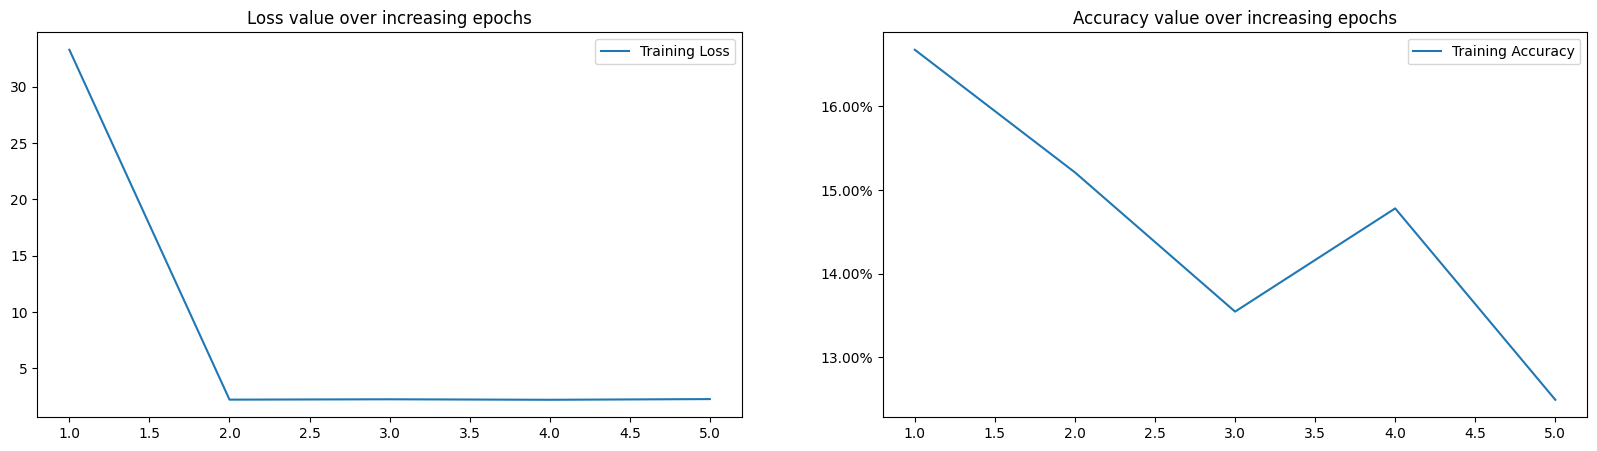

In [24]:
import matplotlib.ticker as mtick

epochs = np.arange(5)+1
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.title('Loss value over increasing epochs')
plt.plot(epochs, losses, label='Training Loss')
plt.legend()
plt.subplot(122)
plt.title('Accuracy value over increasing epochs')
plt.plot(epochs, accuracies, label='Training Accuracy')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
plt.legend()

Our training accuracy is at 12% at the end of the five epochs. Note that the loss value did not decrease considerably over an increasing number of epochs. In other words, no matter how long we wait, it is unlikely that the model is going to provide high accuracy (say, above 80%). This calls for us to understand how the various hyperparameters that were used impact the accuracy of our neural network.

Note that since we did not specify `torch.random_seed(0)` at the start of code, the results might vary when you execute the code provided. However, the results you get should also let you reach a similar conclusion.

Now that you have a complete picture of how to train a neural network, let’s study some good practices we should follow to achieve good model performance and the reasons behind using them. This can be achieved by fine-tuning various hyperparameters, some of which we will look at in the upcoming sections.

## Scaling a dataset to improve model accuracy

Scaling a dataset is the process of ensuring that the variables are confined to a finite range. In this section, we will confine the independent variables’ values to between `0` and `1` by dividing each input value by the maximum possible value in the dataset. This is a value of `255`, which corresponds to white pixels:

1. Fetch the dataset, as well as the training images and targets, as we did in the previous section. 

2. Modify `FMNISTDataset`, which fetches data, so that the input image is divided by 255 (the maximum intensity/value of a pixel):

In [25]:
class FMNISTDataset(Dataset):
    def __init__(self, x, y):
        x = x.float()/255
        x = x.view(-1,28*28)
        self.x, self.y = x, y
    
    def __getitem__(self, ix):
        x, y = self.x[ix], self.y[ix]
        return x.to(device), y.to(device)

    def __len__(self):
        return len(self.x)

Note that the only change we’ve made here compared to the previous section is that we divide the input data by the maximum possible pixel value: `255`.

Given that the pixel values range between `0` to `255`, dividing them by `255` will result in values that are always between `0` and `1`.

3. Train a model, just like we did in *steps 4, 5, 6*, and *7*, of the previous section. The variations for the training loss and accuracy values are as follows:

Epoch 0:	Loss: 0.8438	Accuracy: 0.7362
Epoch 1:	Loss: 0.5375	Accuracy: 0.8188
Epoch 2:	Loss: 0.4834	Accuracy: 0.8347
Epoch 3:	Loss: 0.4546	Accuracy: 0.8437
Epoch 4:	Loss: 0.4351	Accuracy: 0.8492


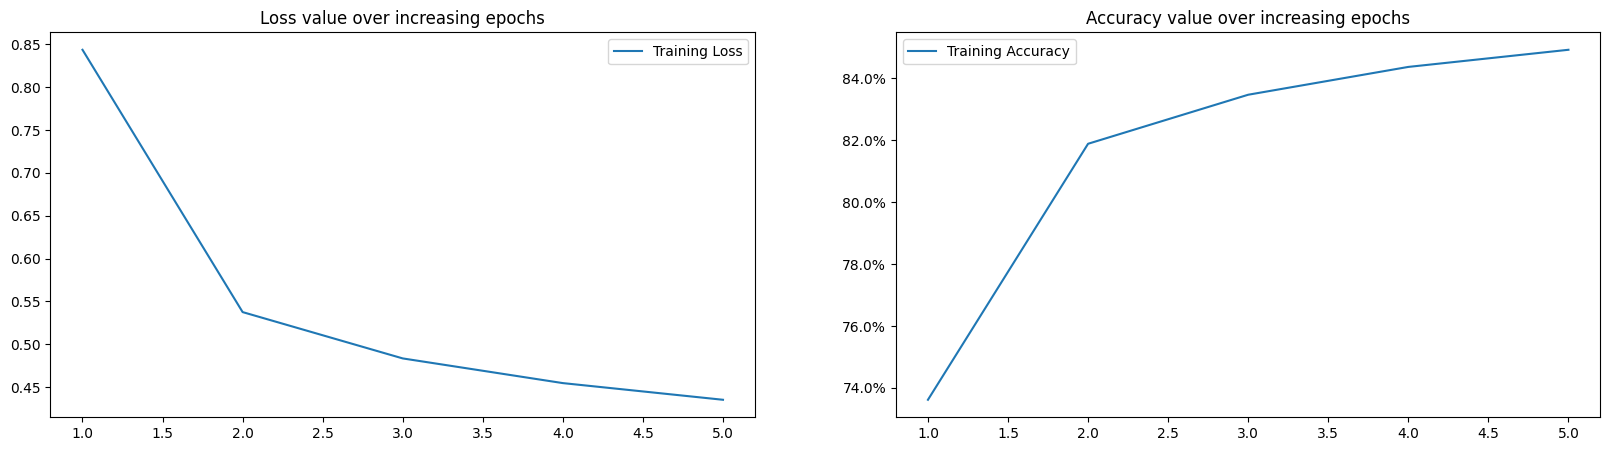

In [26]:
trn_dl = get_data()
model, loss_fn, optimizer = get_model()

losses, accuracies = [], []
for epoch in range(5):
    epoch_losses, epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss, prediction = train_batch(x, y, model, optimizer, loss_fn)
        is_correct = accuracy(prediction, y)
        
        epoch_losses.append(batch_loss)
        epoch_accuracies.extend(is_correct)

    epoch_loss = np.array(epoch_losses).mean()
    epoch_accuracy = np.mean(epoch_accuracies)
    
    losses.append(epoch_loss)
    accuracies.append(epoch_accuracy)
    print(f"Epoch {epoch}:\tLoss: {epoch_loss:.4f}\tAccuracy: {epoch_accuracy:.4f}")

import matplotlib.ticker as mtick

epochs = np.arange(5)+1
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.title('Loss value over increasing epochs')
plt.plot(epochs, losses, label='Training Loss')
plt.legend()
plt.subplot(122)
plt.title('Accuracy value over increasing epochs')
plt.plot(epochs, accuracies, label='Training Accuracy')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
plt.legend()

As we can see, the training loss consistently reduced and the training accuracy consistently increased to an accuracy of ~85%. Contrast the preceding output with the scenario where input data is not scaled, where training loss did not reduce consistently, and the accuracy of the training dataset at the end of five epochs was only 12%.

> Scaling the input dataset so that it contains a much smaller range of values generally helps to achieve better model accuracy.

Next, we’ll learn about the impact of one of the other major hyperparameters of any neural network: **batch size**.

## Building a deeper neural network

So far, our neural network architecture only has one hidden layer. In this section, we will contrast the performance of models where there are two hidden layers and no hidden layer (with no hidden layer being a logistic regression).

In [27]:
val_fmnist = datasets.FashionMNIST(data_folder, download=True, train=False)

val_images = val_fmnist.data
val_targets = val_fmnist.targets

In [28]:
class FMNISTDataset(Dataset):
    def __init__(self, x, y):
        x = x.float()
        x = x.view(-1, 28 * 28) / 255
        self.x, self.y = x, y

    def __getitem__(self, ix):
        x, y = self.x[ix], self.y[ix]
        return x.to(device), y.to(device)

    def __len__(self):
        return len(self.x)

In [29]:
def get_data():
    train = FMNISTDataset(tr_images, tr_targets)
    trn_dl = DataLoader(train, batch_size=32, shuffle=True)
    val = FMNISTDataset(val_images, val_targets)
    val_dl = DataLoader(val, batch_size=len(val_images), shuffle=False)
    return trn_dl, val_dl

In [30]:
@torch.no_grad()
def val_loss(x, y, model, loss_fn):
    model.eval()
    prediction = model(x)
    val_loss = loss_fn(prediction, y)
    return val_loss.item(), prediction

In [31]:
def train(model, loss_fn, optimizer, trn_dl, val_dl, n_epochs=5):
    train_losses, train_accuracies = [], []
    val_losses, val_accuracies = [], []
    for epoch in range(n_epochs):
        train_epoch_losses, train_epoch_accuracies = [], []
        for ix, batch in enumerate(iter(trn_dl)):
            x, y = batch
            batch_loss, prediction = train_batch(x, y, model, optimizer, loss_fn)
            train_is_correct = accuracy(prediction, y)

            train_epoch_losses.append(batch_loss)
            train_epoch_accuracies.extend(train_is_correct)
        
        train_epoch_loss = np.mean(train_epoch_losses)
        train_epoch_accuracy = np.mean(train_epoch_accuracies)
        
        val_epoch_losses, val_epoch_accuracies = [], []
        for ix, batch in enumerate(iter(val_dl)):
            x, y = batch
            val_batch_loss, prediction = val_loss(x, y, model, loss_fn)
            val_is_correct = accuracy(prediction, y)

            val_epoch_losses.append(val_batch_loss)
            val_epoch_accuracies.extend(val_is_correct)
    
        val_epoch_loss = np.mean(val_epoch_losses)
        val_epoch_accuracy = np.mean(val_epoch_accuracies)

        train_losses.append(train_epoch_loss)
        train_accuracies.append(train_epoch_accuracy)
        val_losses.append(val_epoch_loss)
        val_accuracies.append(val_epoch_accuracy)

        torch.cuda.empty_cache()
        print(f"Epoch {epoch}:\tTrain Loss: {train_epoch_loss:.4f}\tTrain Accuracy: {train_epoch_accuracy:.4f}\tVal Loss: {val_epoch_loss:.4f}\tVal Accuracy: {val_epoch_accuracy:.4f}")
    return train_losses, train_accuracies, val_losses, val_accuracies

In [32]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

def plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = np.arange(len(train_losses)) + 1

    # First plot (losses)
    plt.subplot(211)
    plt.plot(epochs, train_losses, "b", label="Training loss")
    plt.plot(epochs, val_losses, "r", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
    plt.title("Training and validation loss with no hidden layer")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid("off")
    # plt.show()

    # Second plot (accuracies)
    plt.subplot(212)
    plt.plot(epochs, train_accuracies, "b", label="Training accuracy")
    plt.plot(epochs, val_accuracies, "r", label="Validation accuracy")
    plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
    plt.title("Training and validation accuracy with no hidden layer")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
    plt.legend()
    plt.grid("off")
    
    plt.tight_layout()
    plt.show()

A model with two layers within a network can be built as follows (note that we have kept the number of units in the second hidden layer set to 1,000). The modified `get_model` function, where there are two hidden layers, is as follows:

In [33]:
from torch.optim import Adam

def get_model_2h():
    model = nn.Sequential(
                nn.Linear(28 * 28, 1000),
                nn.ReLU(),
                nn.Linear(1000, 1000),
                nn.ReLU(),
                nn.Linear(1000, 10)
            ).to(device)
    
    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=1e-3)
    return model, loss_fn, optimizer

Similarly, the `get_model` function, where there are no hidden layers and one hiddel layers, are as follows:

In [34]:
def get_model_0h():
    model = nn.Sequential(
                nn.Linear(28 * 28, 10)
            ).to(device)
    
    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=1e-3)
    return model, loss_fn, optimizer

def get_model_1h():
    model = nn.Sequential(
                nn.Linear(28 * 28, 1000),
                nn.ReLU(),
                nn.Linear(1000, 10)
            ).to(device)
    
    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=1e-3)
    return model, loss_fn, optimizer

### Model with 0 hidden layers

Epoch 0:	Train Loss: 0.5961	Train Accuracy: 0.7987	Val Loss: 0.5165	Val Accuracy: 0.8203
Epoch 1:	Train Loss: 0.4593	Train Accuracy: 0.8433	Val Loss: 0.4761	Val Accuracy: 0.8356
Epoch 2:	Train Loss: 0.4350	Train Accuracy: 0.8507	Val Loss: 0.4646	Val Accuracy: 0.8391
Epoch 3:	Train Loss: 0.4219	Train Accuracy: 0.8543	Val Loss: 0.4660	Val Accuracy: 0.8335
Epoch 4:	Train Loss: 0.4142	Train Accuracy: 0.8574	Val Loss: 0.4532	Val Accuracy: 0.8402


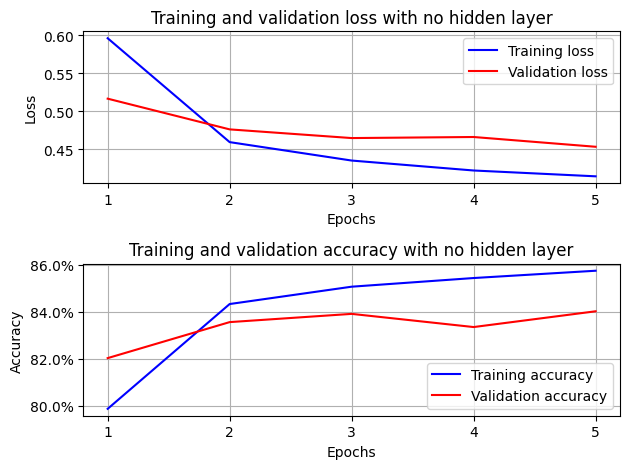

In [35]:
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model_0h()
train_losses, train_accuracies, val_losses, val_accuracies = train(model, loss_fn, optimizer, trn_dl, val_dl)
plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies)

### Model with 1 hidden layers

Epoch 0:	Train Loss: 0.4753	Train Accuracy: 0.8278	Val Loss: 0.4515	Val Accuracy: 0.8354
Epoch 1:	Train Loss: 0.3581	Train Accuracy: 0.8686	Val Loss: 0.3673	Val Accuracy: 0.8685
Epoch 2:	Train Loss: 0.3172	Train Accuracy: 0.8835	Val Loss: 0.3575	Val Accuracy: 0.8686
Epoch 3:	Train Loss: 0.2945	Train Accuracy: 0.8904	Val Loss: 0.3365	Val Accuracy: 0.8781
Epoch 4:	Train Loss: 0.2753	Train Accuracy: 0.8979	Val Loss: 0.3375	Val Accuracy: 0.8805


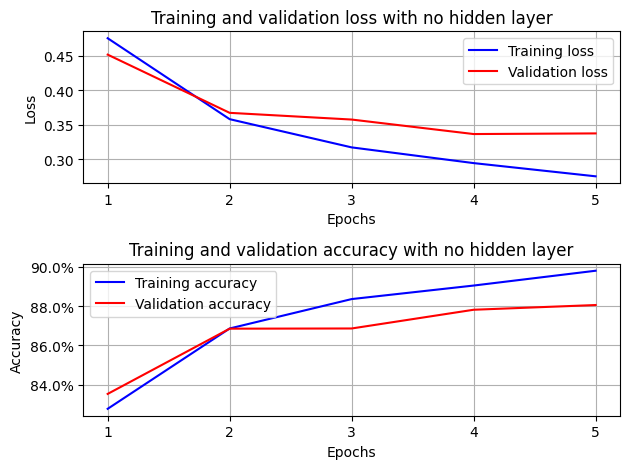

In [36]:
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model_1h()
train_losses, train_accuracies, val_losses, val_accuracies = train(model, loss_fn, optimizer, trn_dl, val_dl)
# torch.save(model.state_dict(), 'fmnist-dnn.pth')
plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies)

### Model with 2 hidden layers

Epoch 0:	Train Loss: 0.4799	Train Accuracy: 0.8233	Val Loss: 0.4007	Val Accuracy: 0.8556
Epoch 1:	Train Loss: 0.3611	Train Accuracy: 0.8664	Val Loss: 0.3907	Val Accuracy: 0.8606
Epoch 2:	Train Loss: 0.3222	Train Accuracy: 0.8802	Val Loss: 0.3805	Val Accuracy: 0.8618
Epoch 3:	Train Loss: 0.2957	Train Accuracy: 0.8888	Val Loss: 0.3412	Val Accuracy: 0.8756
Epoch 4:	Train Loss: 0.2799	Train Accuracy: 0.8957	Val Loss: 0.3442	Val Accuracy: 0.8774


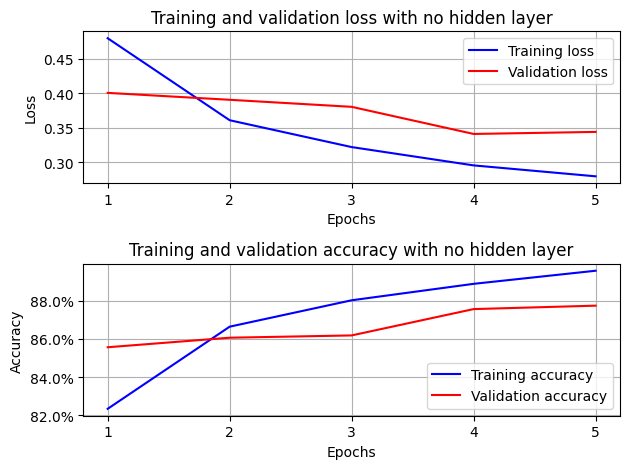

In [37]:
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model_2h()
train_losses, train_accuracies, val_losses, val_accuracies = train(model, loss_fn, optimizer, trn_dl, val_dl)
plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies)

Here, take note of the following:

- The model was unable to learn well when there were no hidden layers.
- The model overfit by a larger amount when there were two hidden layers compared to one hidden layer (the validation loss is higher in the model with two layers compared to the model with one layer).


## The concept of overfitting

So far, we’ve seen that the accuracy of the training dataset is typically more than 95%, while the accuracy of the validation dataset is ~89%. Essentially, this indicates that a model does not generalize as much on unseen datasets, since it can learn from the training dataset. This also indicates that the model learns all the possible edge cases for the training dataset; these can’t be applied to the validation dataset.

> Having high accuracy on the training dataset and considerably lower accuracy on the validation dataset refers to the scenario of overfitting.

Some of the typical strategies that are employed to reduce the effect of overfitting are dropout and regularization. We will look at what impact they have on training and validation losses in the following sections.

### Impact of adding dropout

Dropout is a mechanism that randomly chooses a specified percentage of node activations and reduces them to 0. In the next iteration, another random set of hidden units is switched off. This way, the neural network does not optimize for edge cases, as the network does not get that many opportunities to adjust the weight to memorize for edge cases (given that the weight is not updated in each iteration).

Keep in mind that, during prediction, dropout doesn’t need to be applied, since this mechanism can only be applied while training a model.

Usually, there are cases where the layers behave differently during training and validation, as you saw in the case of dropout. For this reason, you must specify the mode for the model upfront using one of two methods: `model.train()` to let the model know it is in training mode and `model.eval()` to let it know that it is in evaluation mode. If we don’t do this, we might get unexpected results. For example, in the following image, notice how the model (which contains dropout) gives us different predictions on the same input when in training mode.

However, when the same model is in `eval` mode, it will suppress the dropout layer and return the same output:

In [38]:
def get_model():
    model = nn.Sequential(
                nn.Dropout(0.25),
                nn.Linear(28 * 28, 1000),
                nn.ReLU(),
                nn.Dropout(0.25),
                nn.Linear(1000, 10)
            ).to(device)
    
    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=1e-3)
    return model, loss_fn, optimizer


Note that, in the preceding code, `Dropout` is specified before linear activation. This specifies that a fixed percentage of the weights in the linear activation layer won’t be updated.

Epoch 0:	Train Loss: 0.5369	Train Accuracy: 0.8045	Val Loss: 0.4197	Val Accuracy: 0.8448
Epoch 1:	Train Loss: 0.4240	Train Accuracy: 0.8433	Val Loss: 0.3856	Val Accuracy: 0.8599
Epoch 2:	Train Loss: 0.3943	Train Accuracy: 0.8545	Val Loss: 0.3715	Val Accuracy: 0.8636
Epoch 3:	Train Loss: 0.3768	Train Accuracy: 0.8595	Val Loss: 0.3547	Val Accuracy: 0.8721
Epoch 4:	Train Loss: 0.3639	Train Accuracy: 0.8665	Val Loss: 0.3652	Val Accuracy: 0.8650


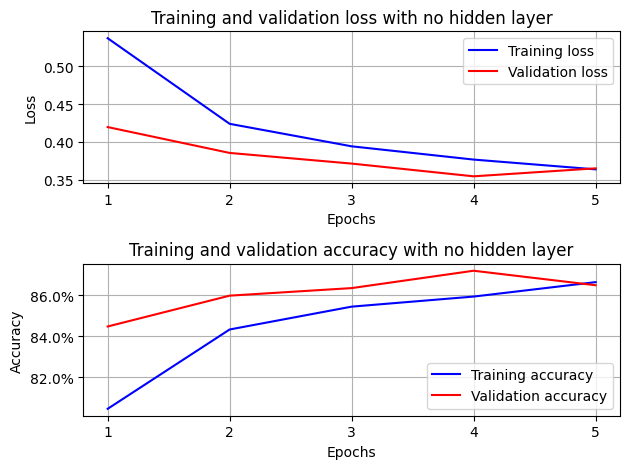

In [39]:
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()
train_losses, train_accuracies, val_losses, val_accuracies = train(model, loss_fn, optimizer, trn_dl, val_dl)
plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies)

## Summary

Now that we have learned about image classification using a deep neural network, as well as the various hyperparameters that help train a model, in the next chapter, we will learn about how what we’ve learned in this chapter can fail and how to address this, using convolutional neural networks.